In [15]:
!pip install matplotlib
!pip install hmmlearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


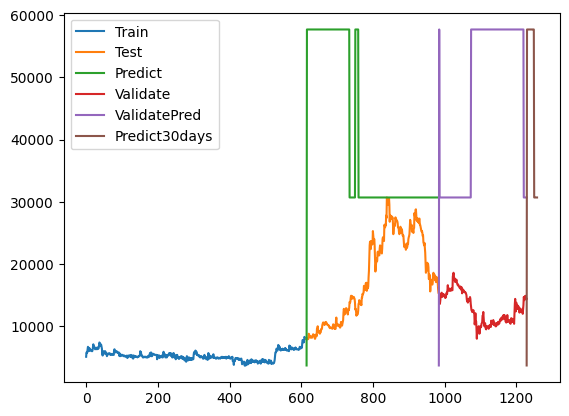

[[ 3700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [57700.]
 [30700.]
 [30700.]
 [30700.]
 [30700.]
 [30700.]
 [30700.]
 [30700.]
 [30700.]
 [30700.]]


In [16]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
drive.mount('/content/drive')

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VNP.csv')

# Chỉ lấy cột giá đóng cửa
# closing_prices = data['Price'].values.reshape(-1, 1)
closing_prices=data.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
closing_prices=scaler.fit_transform(np.array(closing_prices).reshape(-1,1))

# 4. Chia train test
train_size = int(0.5 * len(closing_prices))
test_size = int(0.3 * len(closing_prices))
val_size = len(closing_prices) - train_size - test_size

train_data = closing_prices[:train_size]
test_data = closing_prices[train_size:train_size+test_size]
val_data = closing_prices[train_size+test_size:]

# Tạo và huấn luyện mô hình HMM với tập huấn luyện
model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(closing_prices)

# Dự đoán trạng thái ẩn cho tập kiểm tra
hidden_states = model.predict(closing_prices)
y_pred = model.predict(test_data)
y_pred_val = model.predict(val_data)
# Dự đoán trạng thái ẩn cho 30 ngày tiếp theo
y_pred_30days = model.predict(closing_prices[-30:])

# Dự đoán giá cổ phiếu dựa trên trạng thái ẩn
# y_pred_30days = [model.means_[int(state)][0] for state in y_pred_30days]

# Scale data
hidden_states=scaler.inverse_transform(hidden_states.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1,1))
y_pred_30days = scaler.inverse_transform(y_pred_30days.reshape(-1,1))

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(closing_prices)-1, stop=len(closing_prices)+29, step=1)
plt.plot(prediect_data_index,y_pred_30days)

# plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# xuất kết quả dự đoán
print(y_pred_30days)


In [17]:
# Tính toán các độ đo
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

# scaler test_data, val_data
test_data = scaler.inverse_transform(test_data.reshape(-1,1))
val_data = scaler.inverse_transform(val_data.reshape(-1,1))

rmse_test = np.sqrt(mean_squared_error(test_data, y_pred))
mape_test = mean_absolute_percentage_error(test_data, y_pred) * 100
mse_test = mean_squared_error(test_data, y_pred)
test_mae = mean_absolute_error(test_data, y_pred)


rmse_val = np.sqrt(mean_squared_error(val_data, y_pred_val))
mape_val = mean_absolute_percentage_error(val_data, y_pred_val) * 100
mse_val = mean_squared_error(val_data, y_pred_val)
valid_mae = mean_absolute_error(val_data,y_pred_val)

# In kết quả test data
print("RMSE Test:", rmse_test)
print("MAPE Test:", mape_test)
print("MSE Test:", mse_test)
print('MAE Test:', test_mae)

# In kết quả val data
print("RMSE Val:", rmse_val)
print("MAPE Val:", mape_val)
print("MSE Val:", mse_val)
print('MAE Val:', valid_mae)

RMSE Test: 29135.709006224522
MAPE Test: 197.16102571401694
MSE Test: 848889539.2953928
MAE Test: 22147.42547425474
RMSE Val: 37405.59444702035
MAPE Val: 295.2991387209105
MSE Val: 1399178495.9349592
MAE Val: 34058.94308943089


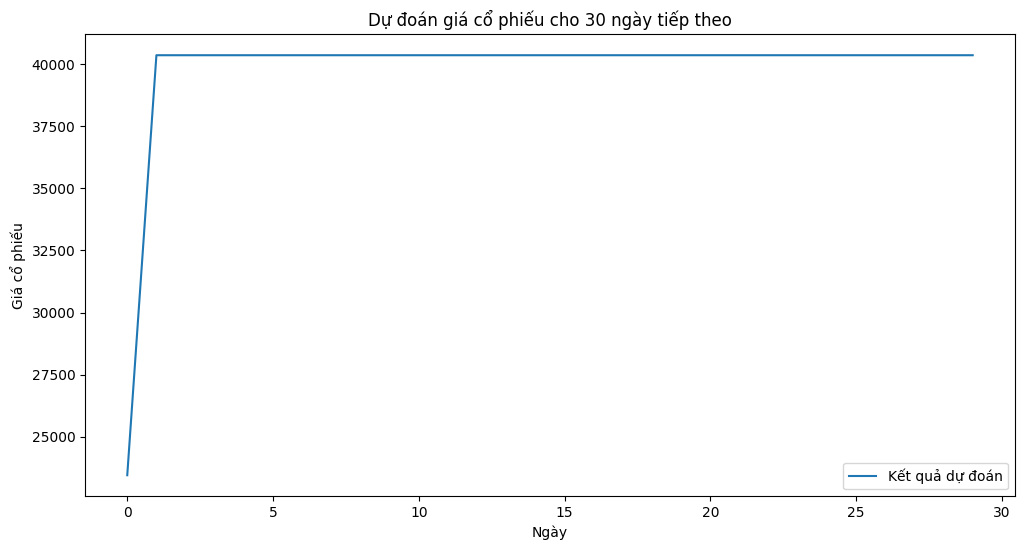

[23444.94413778199, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235, 40367.45083411235]


In [18]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMG.csv')

# Chỉ lấy cột giá đóng cửa
closing_prices = data['Price'].values.reshape(-1, 1)

# Tạo và huấn luyện mô hình HMM với toàn bộ dữ liệu
model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(closing_prices)

# Dự đoán trạng thái ẩn cho 30 ngày tiếp theo
predicted_states = model.predict(closing_prices[-30:])

# Dự đoán giá cổ phiếu dựa trên trạng thái ẩn
predicted_prices = [model.means_[int(state)][0] for state in predicted_states]

# Vẽ biểu đồ kết quả thực tế và dự đoán
actual_prices = closing_prices[-30:]

plt.figure(figsize=(12, 6))
# plt.plot(range(len(actual_prices)), actual_prices, label='Kết quả thực tế')
plt.plot(range(len(actual_prices)), predicted_prices, label='Kết quả dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Dự đoán giá cổ phiếu cho 30 ngày tiếp theo')
plt.legend()
plt.show()
#xuất kết quả dự đoán
print(predicted_prices)

In [19]:
# Tính toán các độ đo
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100
mae = mean_absolute_error(actual_prices, predicted_prices)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 3878.3138154467115
MAPE: 4.675063836763023
MAE: 1998.299389098661
